In [1]:
# Import the ususal library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy


import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os 
print(os.getcwd())

c:\Users\ahmad\AppData\Local\Programs\Microsoft VS Code


# Numerical Summary

In [3]:
# list umur 
age = [26, 29, 31, 35, 17, 20, 15, 40, 33]

In [4]:
# mean
mean = np.mean(age)
mean

np.float64(27.333333333333332)

In [5]:
# median
median = np.median(age)
median

np.float64(29.0)

In [6]:
# standar deviasi
std = np.std(age)
std

np.float64(8.04155872120988)

In [7]:
# varians
var = np.var(age)
var

np.float64(64.66666666666667)

In [8]:
# kuarti 1
q1 = np.quantile(age, 0.25)
q1

np.float64(20.0)

In [9]:
# kuarti 3
q3 = np.quantile(age, 0.75)
q3

np.float64(33.0)

In [10]:
# inter quartile range (iqr)
iqr = q3 -q1
iqr

np.float64(13.0)

In [11]:
# load dataset tips dari seaborn
df_tips = sns.load_dataset('tips')
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
# lihat tipe data
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [13]:
# lihat summary
df_tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [14]:
# lihat tipe berdasarkan df_tips.info(), kalo ada object berarti bisa diganti object
df_tips.describe(include = 'category')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


## Frequency Table

In [15]:
# frekuensi nilai unik dalam kolom 'smoker'
df_tips['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [16]:
# frekuensi nilai unik dalam kolom 'day'
df_tips['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

## Cross Tabulation

In [17]:
# tabel frekuensi nilai unik pada kolom day
tab_day = pd.crosstab(df_tips['day'], columns = 'count')
tab_day

col_0,count
day,
Thur,62
Fri,19
Sat,87
Sun,76


In [18]:
# membuat tabel cross tab antara kolom 'sex' dan 'smoker' 
crosstab = pd.crosstab(df_tips['sex'], df_tips['smoker'])
crosstab

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [19]:
# read file from gdrive (ubah id dengan id pada link gdrive)
url = 'https://drive.google.com/uc?id=16q5qAPQwOKFQxmRCBzZ3GFBJqWynlYWD'
df = pd.read_csv(url)

# Graphical Summary

In [20]:
# panggil dataset
df_dist = pd.read_csv(url, index_col=False)
df_dist

,Unnamed: 0,normal,uniform,right_skew,left_skew,bimodal
0,0,54.967142,64.591724,821.801329,2696.515541,514.294309
1,1,48.617357,57.077830,11.873405,2644.341839,1111.432169
2,2,56.476885,35.609673,699.058951,2449.333398,610.708067
3,3,65.230299,98.651525,55.185563,2564.995049,452.509634
4,4,47.658466,60.577482,163.258793,1489.105772,886.116688
...,...,...,...,...,...,...
495,495,55.389100,68.014077,178.600105,1950.855136,862.038184
496,496,39.627538,61.861138,36.689456,2936.358554,595.287455
497,497,48.096613,75.271664,1105.580520,2835.437269,599.831090
498,498,41.243817,15.860511,322.797208,2908.128880,1015.235487


## Histogram

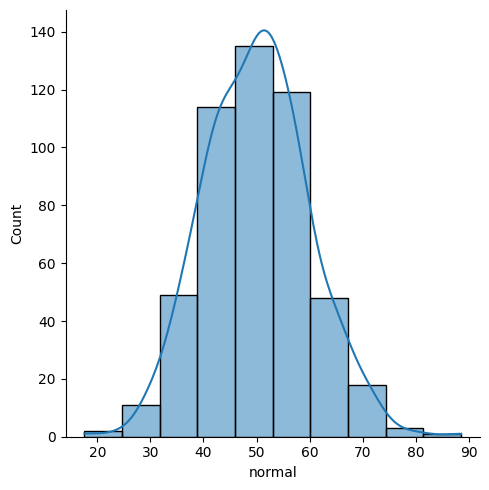

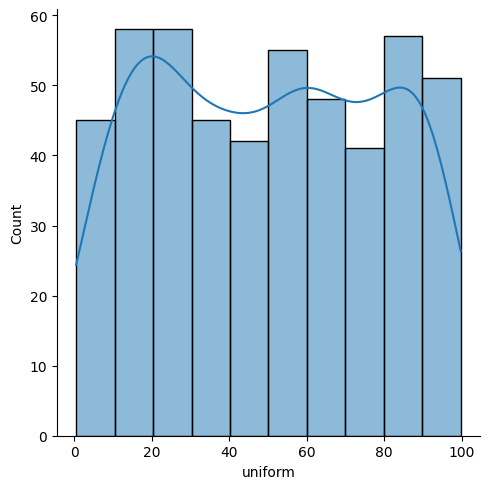

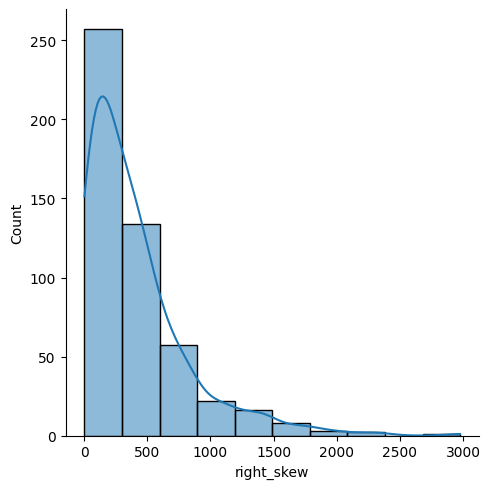

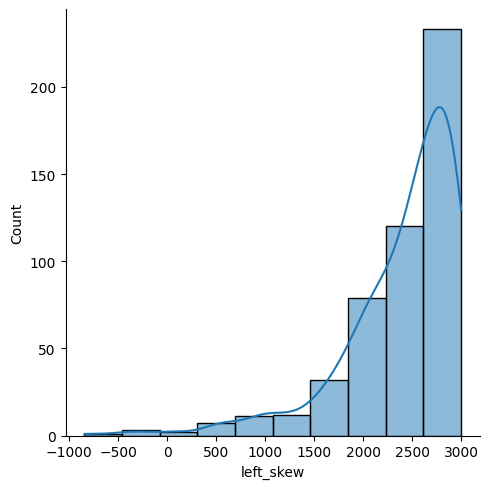

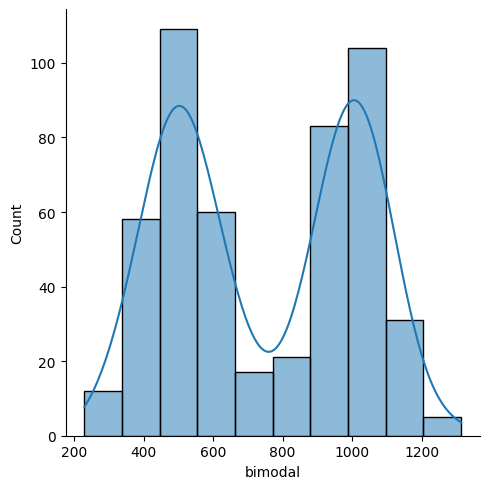

In [21]:
for i in ['normal', 'uniform', 'right_skew', 'left_skew', 'bimodal']:
    sns.displot(df_dist[i], bins = 10, kde = True)
    plt.show

## Boxplot

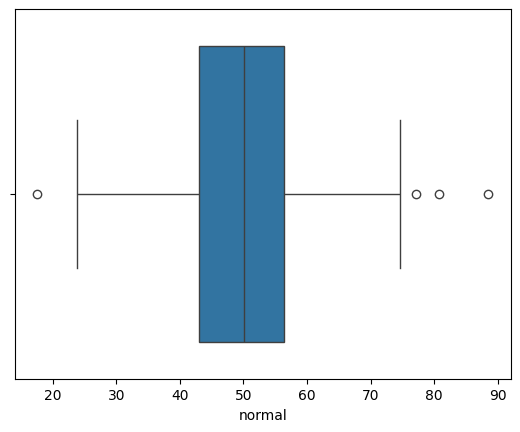

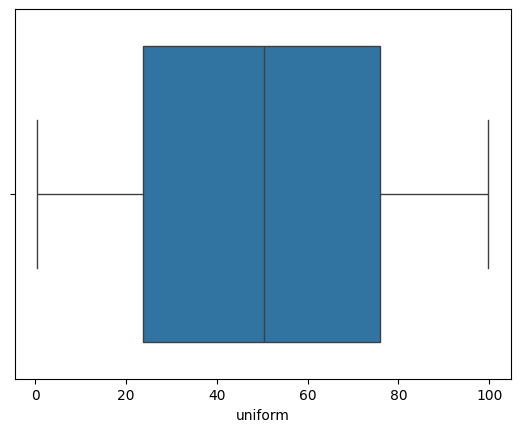

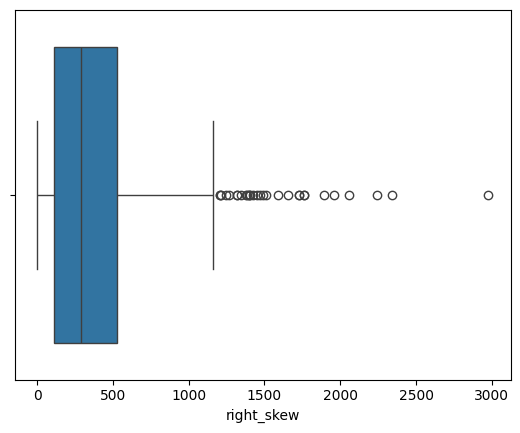

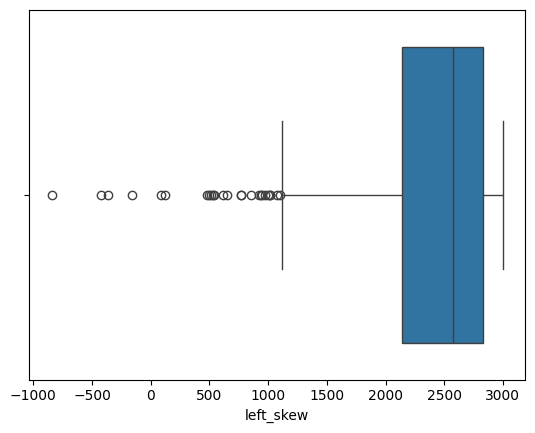

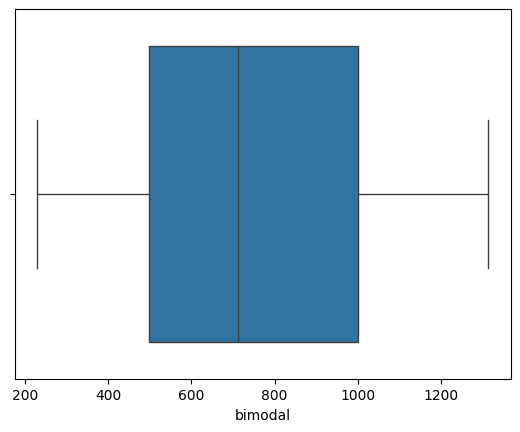

In [22]:
# horizontal 'x'
for i in ['normal', 'uniform', 'right_skew', 'left_skew', 'bimodal']:
    sns.boxplot(x = df_dist[i])
    plt.show()

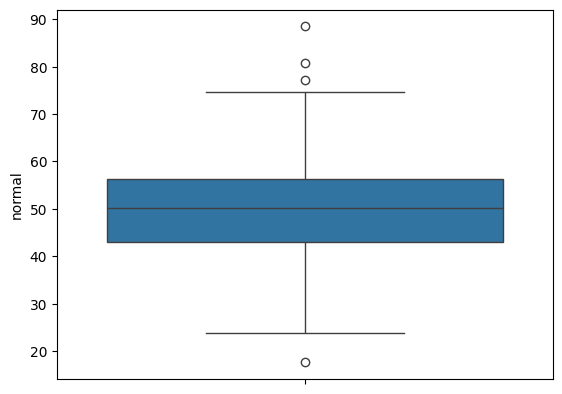

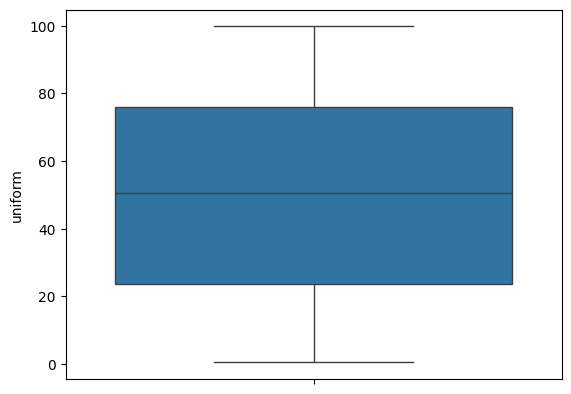

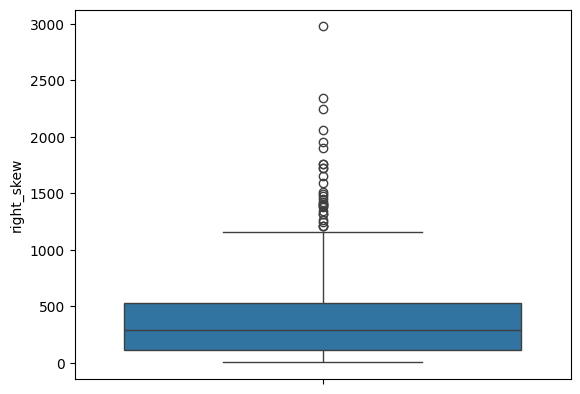

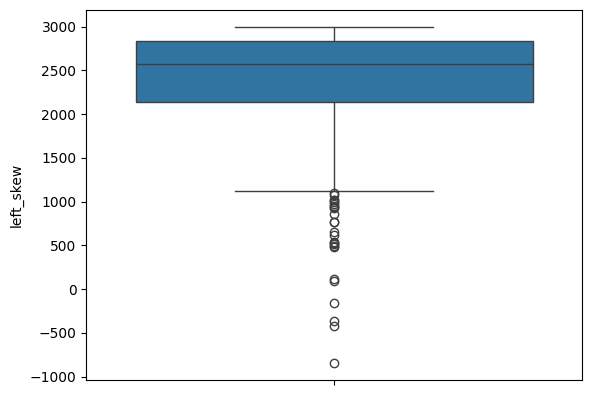

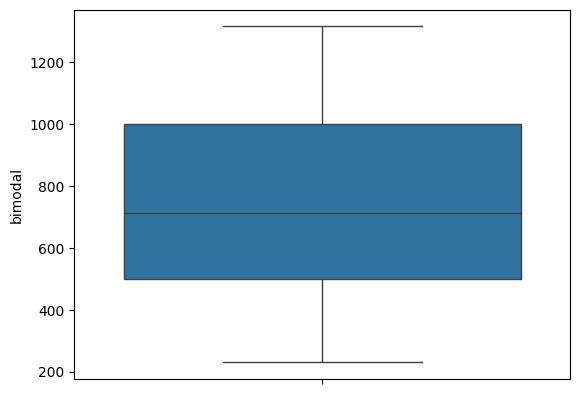

In [23]:
# vertikal 'y'
for i in ['normal', 'uniform', 'right_skew', 'left_skew', 'bimodal']:
    sns.boxplot(y = df_dist[i])
    plt.show()

## Scatterplot

<Axes: xlabel='total_bill', ylabel='tip'>

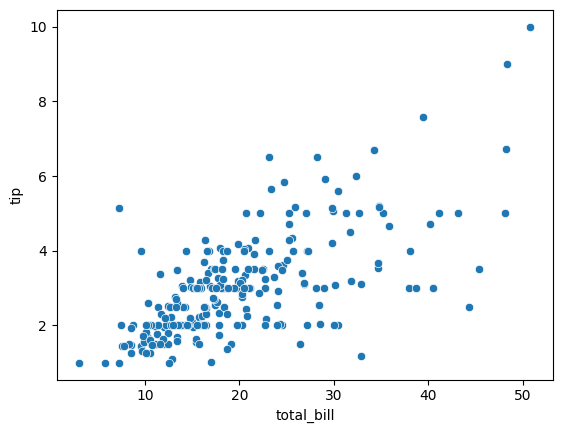

In [24]:
sns.scatterplot(df_tips, x = 'total_bill', y = 'tip')

<Axes: xlabel='total_bill', ylabel='tip'>

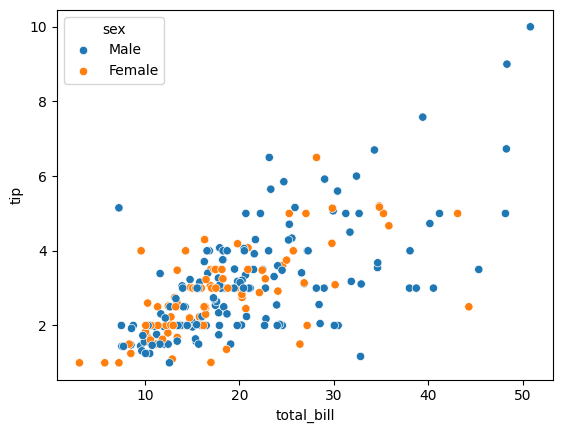

In [25]:
# kalo berdasarkan kategori tertentu tinggal tambah 'hue'
sns.scatterplot(df_tips, x = 'total_bill', y = 'tip', hue = 'sex')

## Piechart

([<matplotlib.patches.Wedge at 0x240451afb60>,
 [Text(0.4790941719285186, 0.9901862321927766, 'Sat'),
  Text(-1.0967192826047463, -0.08489296297650875, 'Sun'),
  Text(0.30743429975292713, -1.0561648315179917, 'Thur'),
  Text(1.067249026516872, -0.2664198104473265, 'Fri')],
 [Text(0.2613240937791919, 0.5401015811960599, '135.7%'),
  Text(-0.598210517784407, -0.04630525253264114, '131.1%'),
  Text(0.1676914362288693, -0.5760899081007226, '125.4%'),
  Text(0.5821358326455665, -0.14531989660763261, '17.8%')])

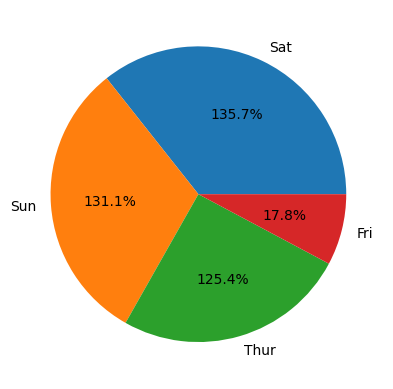

In [26]:
# hitung jumlah pelanggan berdasarkan hari kedatangan
count_day = df_tips['day']. value_counts()

# buat piechart + pake persenan satu angka dibelakang koma
plt.pie(count_day, labels = count_day.index, autopct = '1%.1f%%')

## Barplot

<Axes: xlabel='sex', ylabel='total_bill'>

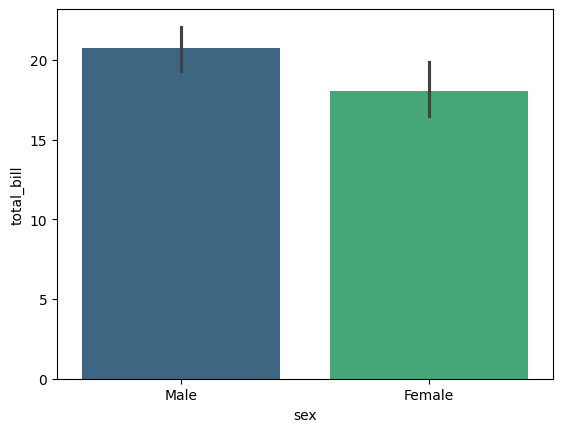

In [27]:
sns.barplot(data = df_tips, x = 'sex', y = 'total_bill', estimator = 'mean', palette = 'viridis')

# Distribusi Normal

## Graphical Summary

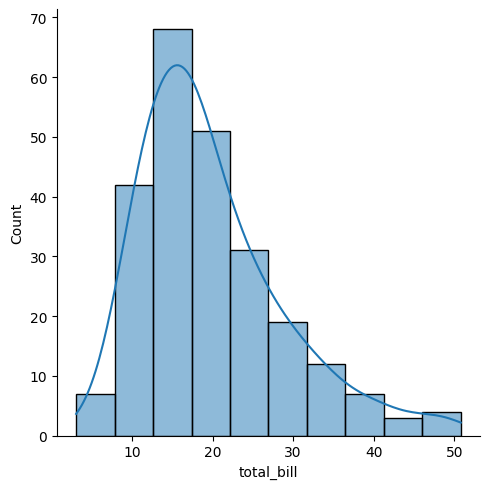

In [28]:
# histogram u/ total bill di df_tips
sns.displot(df_tips['total_bill'], bins = 10, kde = True)

<Axes: xlabel='total_bill'>

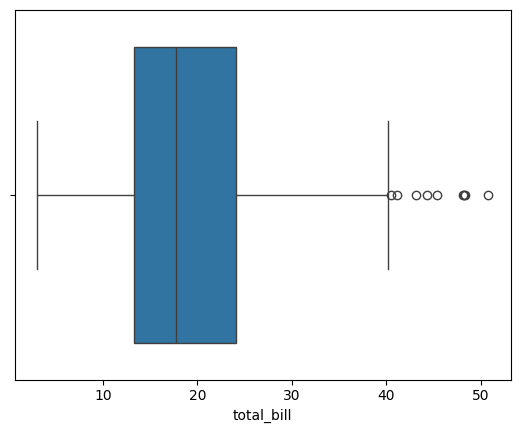

In [29]:
# boxplot u/ total bill di df_tips
sns.boxplot(x = df_tips['total_bill'])

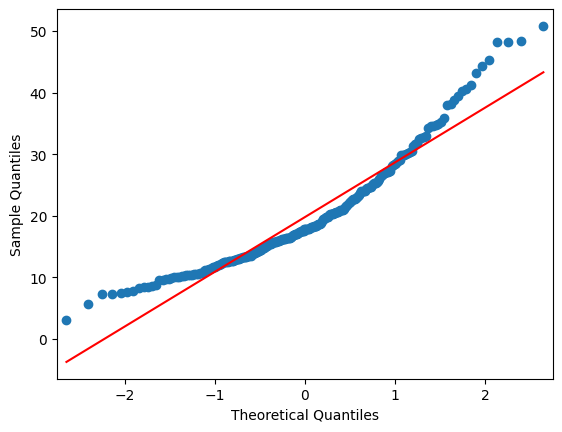

In [37]:
# qqplot u/ total_bill di df_tips
sm.qqplot(df_tips['total_bill'], line = 's')
plt.show()

## Noramlity Test

Hipotesis:
- H0 : Data berdistribusi normal
- Ha : Data tidak berdistribusi normal

alpha = presentase u/ menolak H0 (biasanya pakai 0.05)

### KS Test (U/ Uji Normalitas Normal Baku (mean = 0, std = 1))

In [38]:
from scipy.stats import kstest

In [40]:
# KS Test u/ df_tips['tip]
result = kstest(df_tips['tip'], 'norm')
result

KstestResult(statistic=np.float64(0.8758859725968204), pvalue=np.float64(2.500004286381358e-221), statistic_location=np.float64(1.44), statistic_sign=np.int8(-1))

In [41]:
stats, p_value = kstest(df_tips['tip'], 'norm')

In [45]:
# p-value > 0.05 maka data diasumsikan berdstribusi normal
# p value <= 0.05 maka data diasumsikan tidak berdistribusi normal
if p_value > 0.05:
    print(f'p_value = {p_value:.2f}, datanya berdistribusi normal')
else:
    print(f'p_value = {p_value:.2f}, datanya tidak berdistribusi normal')

p_value = 0.00, datanya tidak berdistribusi normal


### Lilliefors

In [ ]:
# panggil library dulu
from statsmodels.stats.diagnostic import lilliefors

In [48]:
# lilliefors u/ df_tips['tip]
result = lilliefors(df_tips['tip'])
result 

(np.float64(0.10165341933928473), np.float64(0.0009999999999998899))

In [49]:
stats, p_value = lilliefors(df_tips['tip'])

In [50]:
# p-value > 0.05 maka data diasumsikan berdstribusi normal
# p value <= 0.05 maka data diasumsikan tidak berdistribusi normal
if p_value > 0.05:
    print(f'p_value = {p_value:.2f}, datanya berdistribusi normal')
else:
    print(f'p_value = {p_value:.2f}, datanya tidak berdistribusi normal')

p_value = 0.00, datanya tidak berdistribusi normal


### Shapiro-Wilk

In [ ]:
from scipy.stats import shapiro

In [53]:
# shapiro u/ df_tips['tip]
result = shapiro(df_tips['tip'])
result 

ShapiroResult(statistic=np.float64(0.8978110496018736), pvalue=np.float64(8.200360128656718e-12))

In [54]:
stats, p_value = shapiro(df_tips['tip'])

In [55]:
# p-value > 0.05 maka data diasumsikan berdstribusi normal
# p value <= 0.05 maka data diasumsikan tidak berdistribusi normal
if p_value > 0.05:
    print(f'p_value = {p_value:.2f}, datanya berdistribusi normal')
else:
    print(f'p_value = {p_value:.2f}, datanya tidak berdistribusi normal')

p_value = 0.00, datanya tidak berdistribusi normal


### D'Agostino & Pearson

In [ ]:
from scipy.stats import normaltest

In [ ]:
# normaltest u/ df_tips['tip]
result = normaltest(df_tips['tip'])
result 

NormaltestResult(statistic=np.float64(79.37862574074785), pvalue=np.float64(5.796294322907102e-18))

In [58]:
stats, p_value = normaltest(df_tips['tip'])

In [59]:
# p-value > 0.05 maka data diasumsikan berdstribusi normal
# p value <= 0.05 maka data diasumsikan tidak berdistribusi normal
if p_value > 0.05:
    print(f'p_value = {p_value:.2f}, datanya berdistribusi normal')
else:
    print(f'p_value = {p_value:.2f}, datanya tidak berdistribusi normal')

p_value = 0.00, datanya tidak berdistribusi normal
